# 1. Matplotlib 이란?


matplotlib은 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 파이썬 라이브러리로써, 우리는 matplotlib의 pyplot을 이용하게 됩니다.

이는 mathworks에서 개발한 매트랩(MATLAB)과 비슷한 형태를 가지고 있습니다.

matplotlib을 이용하면 우리가 이전에 알아본 numpy나 pandas에서 사용되는 자료구조를 쉽게 시각화 할 수 있습니다.


matplotlib을 사용하기 위해서는 먼저 matplotlib을 설치하고 아래와 같이 import를 해주어야 합니다.


```python
import matplotlib
import matplotlib.pyplot as plt
```

또한 jupyter notebook에서 그래프를 제대로 확인하기 위해서는 아래와 같은 매직 커맨드를 작성해주셔야 합니다.

```
%matplotlib inline
```

이러한 매직커맨드는 맨 뒤에 inline 이외에도 우리가 아래에서 사용하는 nbagg 등의 다양한 속성이 있습니다.


## Matplotlib 기초
1. Matplotlib 이란?

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib nbagg
%matplotlib inline
#위와 같이 %로 시작하는 것을 jupyter notebook의 magic command라고 한다.
# %who는 변수명의 리스트를 보여주고 %magic 은 모든 매직명령어를 보여준다.

In [2]:
%magic

In [3]:
# matplotlib 을 jupyter notebook에서 사용할 때, plot의 이미지를 보여주기 위해 magic command를 사용하는데,
# 우리가 사용하는 nbagg에 대해서는 다음 링크에서 확인할 수 있다.
# https://matplotlib.org/users/prev_whats_new/whats_new_1.4.html#the-nbagg-backend
# 이때 우리가 사용하는 nbagg 이외에도 다음과 같은 요소를 사용할 수 있다.
# Available matplotlib backends: ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg','gtk', 'tk', 'inline']
import numpy as np
import pandas as pd

### 2. Plot의 종류
Line plot 그리기

In [4]:
# Series를 통한 line plot 그리기
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))  # 행은 0~1랜덤 10개 누적합 열은 0부터 100까지 10간격
# numpy.arange([start, ] stop, [step, ] dtype=None)
s

0     0.627272
10   -0.826162
20    0.267594
30    0.527492
40   -1.893626
50   -1.031880
60   -1.968105
70   -1.503950
80   -2.787710
90   -2.036085
dtype: float64

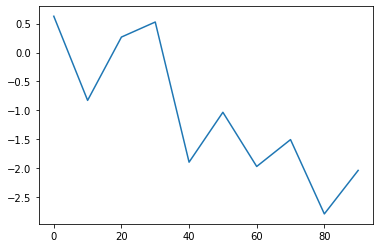

In [5]:
# 위에서 정의한 s라는 시리즈에 대해서 line plot을 그리고 싶다면?
s.plot()

s 라는 Series에서의 index와 value를 통해 그래프가 그려졌다.

In [6]:
# DataFrame을 통한 line plot 그리기
df = pd.DataFrame(np.random.randn(10, 4).cumsum(axis=0),    # 10X4 크기의 0~1범위를 갖는 랜덤 넘버 행 기준 누적합
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,1.328772,0.527676,0.537962,0.094090
10,1.278988,-0.910096,-1.004438,0.202402
20,0.812540,-0.496094,-0.110327,1.666894
30,0.580682,0.941693,1.617889,2.347004
40,1.254131,0.354420,1.761873,2.948920
50,0.002268,1.243579,4.069376,2.519657
60,0.900405,2.861130,3.035214,3.062480
70,0.208107,1.317169,3.396956,1.654192
80,0.059690,0.968752,4.942686,2.957318
90,0.546603,1.212456,3.859381,2.090324


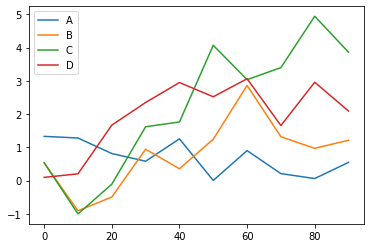

In [7]:
df.plot()

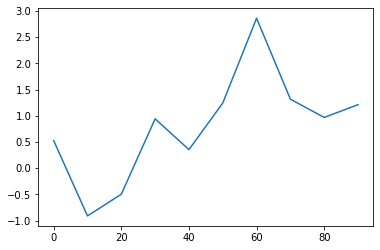

In [8]:
# 하나의 열에 대해서만 보고 싶다면?
df['B'].plot()

### Bar plot 그리기

In [9]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2

a    0.791079
b    0.395317
c    0.407227
d    0.615952
e    0.543430
f    0.431925
g    0.691265
h    0.668306
i    0.151740
j    0.677675
k    0.694675
l    0.766290
m    0.804694
n    0.081740
o    0.639273
p    0.606338
dtype: float64

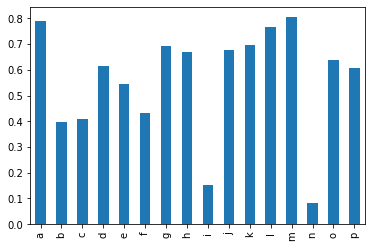

In [10]:
s2.plot(kind='bar')

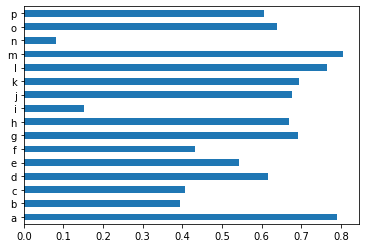

In [11]:
# 가로방향의 bar plot그리기
s2.plot(kind='barh')

In [12]:
df2 = pd.DataFrame(np.random.rand(6, 4), 
                   index=["one", "two", "three", "four", "five", "six"],
                   columns=pd.Index(["A", "B", "C", "D"], name="Numbers"))
df2

Numbers,A,B,C,D
one,0.159630,0.498828,0.468048,0.912370
two,0.640615,0.741674,0.825197,0.974416
three,0.980874,0.057863,0.793207,0.063067
four,0.690609,0.894343,0.710529,0.797402
five,0.743995,0.929165,0.695817,0.239169
six,0.080127,0.582569,0.842211,0.860624


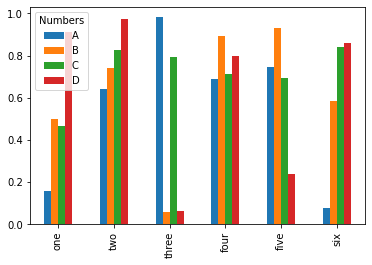

In [13]:
df2.plot(kind='bar')

아래와 같이 Stacked 속성을 True로 설정하면, 하나의 인덱스에 대한 각 열의 값을 한줄로 쌓아서 나타내준다.

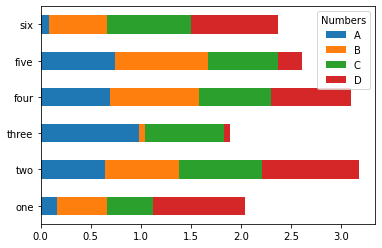

In [14]:
df2.plot(kind='barh', stacked=True)

### Histogram 그리기

In [15]:
# histogram은 index가 필요없다.
s3 = pd.Series(np.random.normal(0, 1, size=200))
s3
# np.random.normal(정규분포 평균, 표준편차, (행, 열) or 개수)

0      0.268322
1      0.095943
2     -0.543049
3     -0.453921
4     -0.489328
         ...   
195    1.314746
196   -1.318792
197    0.421855
198    0.187094
199   -0.694673
Length: 200, dtype: float64

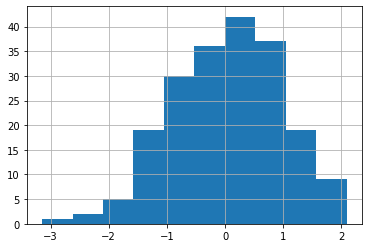

In [16]:
s3.hist()

x 축의 구간 개수를 bin이라고 한다.

이를 직접 설정할 수도 있다.

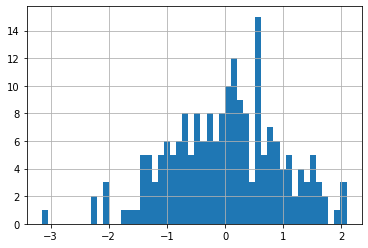

In [17]:
s3.hist(bins=50)

### 산점도(Scatter plot) 그리기
산점도의 경우에는 서로 다른 두 개의 독립변수에 대해 두 변수가 어떤 관계가 있는지 살펴보기 위해 사용된다.

In [18]:
x1 = np.random.normal(1, 1, size=(100, 1)) # 평균 1 표준편차 1 크기 100X1
x2 = np.random.normal(-2, 4, size=(100, 1))
X = np.concatenate((x1, x2), axis=1)    # 두 열로 합치기
X

array([[ 2.43415456e+00,  2.00712812e+00],
       [ 3.06248807e+00, -5.43825915e+00],
       [ 4.28720950e-01,  4.41061729e-01],
       [ 1.66174060e+00,  1.60392263e+00],
       [ 3.66792475e-02, -1.89712835e+00],
       [ 1.56224648e+00, -5.10541899e+00],
       [ 1.11423336e+00, -5.34739645e+00],
       [-3.58782205e-01, -3.47596314e+00],
       [ 1.07483734e+00, -7.91172598e+00],
       [-5.56750683e-03, -4.08223433e+00],
       [ 1.21553714e+00, -7.00928212e-01],
       [ 1.17507139e-02, -5.66044727e+00],
       [ 9.51141866e-01, -1.11476097e+00],
       [ 2.03975015e+00,  9.99160096e-01],
       [ 5.15045602e-01, -4.50225621e+00],
       [-2.95750724e-01, -1.36275287e+00],
       [ 1.31212017e+00,  1.25116529e+00],
       [ 1.50478396e+00,  7.81504266e-01],
       [ 2.08415914e+00, -2.26851687e+00],
       [ 1.13337857e+00,  9.74807566e-01],
       [ 4.47699655e-01, -2.83516167e+00],
       [-3.46521299e-02,  2.56380392e+00],
       [ 1.14929152e+00,  3.74231813e+00],
       [ 1.

In [19]:
df3 = pd.DataFrame(X, columns=["x1", "x2"])
df3

,x1,x2
0,2.434155,2.007128
1,3.062488,-5.438259
2,0.428721,0.441062
3,1.661741,1.603923
4,0.036679,-1.897128
...,...,...
95,0.712025,-5.120522
96,1.777667,5.161683
97,1.881350,-3.738504
98,0.353259,-2.877469


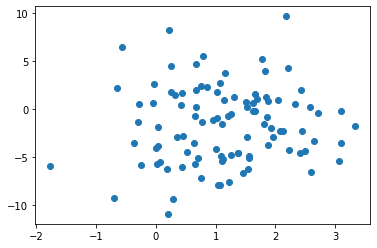

In [20]:
plt.scatter(df3['x1'], df3['x2']) # x1이 x축, x2가 y축

### 3. subplot 그리기

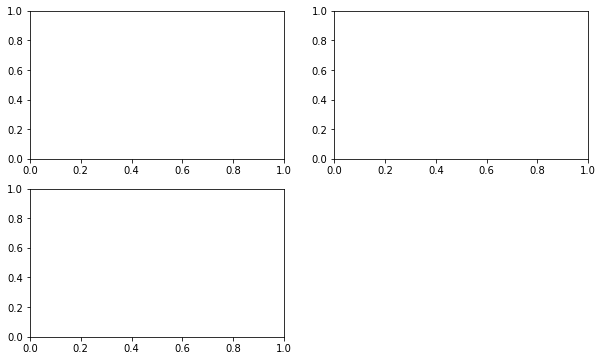

In [21]:
plt.figure(figsize=(10,6))    # 10X6 크기의 도화지

plt.subplot(2,2,1)            # 그 도화지를 2X2로 나눈 부분의 첫번째 부분에 그리기
plt.subplot(2,2,2)            # 그 도화지를 2X2로 나눈 부분의 두번째 부분에 그리기
plt.subplot(2,2,3)            # 그 도화지를 2X2로 나눈 부분의 세번째 부분에 그리기

plt.show()

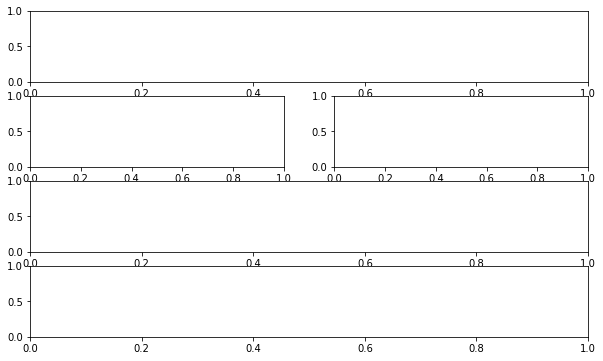

In [22]:
plt.figure(figsize=(10,6))

# 이렇게 , 생략해서 쓸 수도 있다
plt.subplot(411)  # 10,6을 4X1로 잡은 공간 중 첫번째 
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


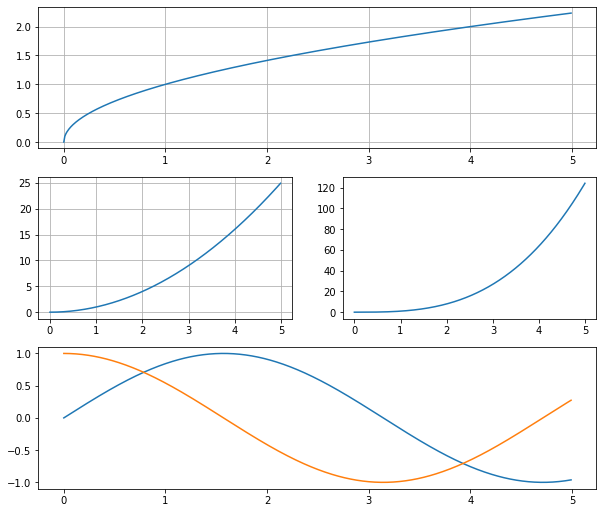

In [25]:
t = np.arange(0,5,0.01)     # 가상의 정의역

plt.figure(figsize=(10,12))

plt.subplot(4,1,1)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(4,2,3)
plt.plot(t,t**2)
plt.grid()

plt.subplot(4,2,4)
plt.plot(t,t**3)
# plt.grid()

plt.subplot(4,1,3)
plt.plot(t,np.sin(t))
# plt.grid()

plt.subplot(4,1,3)
plt.plot(t,np.cos(t))
# plt.grid()

plt.show()